In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/Aviation_Data.csv')
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
# Event.Id #drop, uninformative
# Investigation.Type #drop, uninformative
# Accident.Number 
# Event.Date #split into month and year
# Location #keep to view specifics of US incidents
# Country #keep but change to US and non-US
# Injury.Severity  #drop b/c repeats info from the later injury categories 
# Aircraft.damage #keep
# Registration.Number #drop, uninformative
# Make #keep, maybe use to engineer a new feature using LLM 
# Model #keep, maybe use to engineer a new feature using LLM 
# Amateur.Built #keep: few nan (1.5k) vals, most are not amateur built (80k)
# Number.of.Engines #keep: few NAN values (7.5k), most are have 1 (70k)
# Engine.Type #keep, few unknown (2k) and nan vals (8.5k), most are reciprocating (70k)
# Purpose.of.flight #keep: few unknown (6.8k) and nan (7.6k) vals, most are personal (50k)
# Total.Fatal.Injuries #keep
# Total.Serious.Injuries #keep
# Total.Minor.Injuries #keep
# Total.Uninjured #keep
# Weather.Condition #keep, mostly split between low and high visibility 
# Report.Status #DROP, about 70k are probable cause or nan 
# Publication.Date #DROP, less important than event date; also, skewed towards 2020

In [6]:
#drop columns with more than 20% nans 
nan_cols = list(df.loc[:,df.isna().sum()/len(df) > .2].columns) 

#drop uninformative columns
nan_cols.extend(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Injury.Severity', 'Registration.Number', 'Report.Status', 'Publication.Date'])
nan_cols

['Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Aircraft.Category',
 'FAR.Description',
 'Schedule',
 'Air.carrier',
 'Broad.phase.of.flight',
 'Event.Id',
 'Investigation.Type',
 'Accident.Number',
 'Injury.Severity',
 'Registration.Number',
 'Report.Status',
 'Publication.Date']

In [7]:
# get a list of columns to keep
non_nan_cols = [x for x in df.columns if x not in nan_cols]
non_nan_cols

['Event.Date',
 'Location',
 'Country',
 'Aircraft.damage',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'Purpose.of.flight',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition']

In [8]:
# remove columns from df
df = df[non_nan_cols].copy()
df.head()

,Event.Date,Location,Country,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,1974-08-30,"Saltville, VA",United States,Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,1979-08-02,"Canton, OH",United States,Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC


## Engineered Features

In [9]:
# Check if any of the injury columns have true values. If any do, fill nans with 0s. 
# If all columns are nans, assume the data was not logged and keep them as nans. 
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
injury_data_exists = df[injury_cols].apply(lambda col: any(col), axis = 1)

for col in injury_cols:
    df.loc[injury_data_exists & df[col].isna(), col] = 0

In [10]:
df['Total.Passengers'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries'] + df['Total.Uninjured']
df['Total.Injured'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']
df['Percent.Injured'] = (df['Total.Injured'] / df['Total.Passengers']) * 100
df['Percent.Died'] = (df['Total.Fatal.Injuries'] / df['Total.Passengers']) * 100
df['Injured.Category'] = df['Percent.Injured'].apply(lambda x: 'High' if x >= 50 else 'Low')

In [11]:
#Aircraft Capacity
print(df['Total.Passengers'].apply(lambda x: 'Small' if x < 10 else ('Mid-Size' if x < 40 else 'Large')).value_counts(dropna=False))
print("----------------------------")
df['Passenger.Load'] = df['Total.Passengers'].apply(lambda x: 'Small' if x < 10 else ('Mid-Size' if x < 40 else 'Large'))
df.head()

Total.Passengers
Small       86808
Large        2433
Mid-Size     1107
Name: count, dtype: int64
----------------------------


,Event.Date,Location,Country,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Total.Passengers,Total.Injured,Percent.Injured,Percent.Died,Injured.Category,Passenger.Load
0,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,...,0.0,0.0,0.0,UNK,2.0,2.0,100.0,100.000000,High,Small
1,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,...,0.0,0.0,0.0,UNK,4.0,4.0,100.0,100.000000,High,Small
2,1974-08-30,"Saltville, VA",United States,Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,...,0.0,0.0,0.0,IMC,3.0,3.0,100.0,100.000000,High,Small
3,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,...,0.0,0.0,0.0,IMC,2.0,2.0,100.0,100.000000,High,Small
4,1979-08-02,"Canton, OH",United States,Destroyed,Cessna,501,No,NaN,NaN,Personal,...,2.0,0.0,0.0,VMC,3.0,3.0,100.0,33.333333,High,Small


## Cleaning

In [12]:
# Remove rows where Amateur.Built is Yes or NaN, then remove Amateur.Built column
df = df.drop(df.loc[(df['Amateur.Built']=='Yes') |( df['Amateur.Built'].isna())].index)
df.reset_index(drop = True, inplace = True)
df.drop(columns = 'Amateur.Built', inplace = True)
df.head()

,Event.Date,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Total.Passengers,Total.Injured,Percent.Injured,Percent.Died,Injured.Category,Passenger.Load
0,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,2.0,2.0,100.0,100.000000,High,Small
1,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,4.0,4.0,100.0,100.000000,High,Small
2,1974-08-30,"Saltville, VA",United States,Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,3.0,3.0,100.0,100.000000,High,Small
3,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,2.0,2.0,100.0,100.000000,High,Small
4,1979-08-02,"Canton, OH",United States,Destroyed,Cessna,501,NaN,NaN,Personal,1.0,2.0,0.0,0.0,VMC,3.0,3.0,100.0,33.333333,High,Small


In [13]:
# Clean Weather Condition
df['Weather.Condition'].replace({'Unk':'Unknown'}, inplace = True)
df['Weather.Condition'].fillna('Unknown', inplace = True)
df['Weather.Condition'].value_counts(dropna=False)

Weather.Condition
VMC        69084
IMC         5831
Unknown     4607
UNK          790
Name: count, dtype: int64

In [14]:
# Check if Number.of.Engines = 0 corresponds to no Engine.Type
df[(df['Number.of.Engines']==0) & ((df['Engine.Type']!='NONE') & (df['Engine.Type'].notna()) & (df['Engine.Type'] != 'Unknown'))]

,Event.Date,Location,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Total.Passengers,Total.Injured,Percent.Injured,Percent.Died,Injured.Category,Passenger.Load
21149,1989-03-31,"GREAT HARBOR, Bahamas",Bahamas,Destroyed,Cessna,421B,0.0,Reciprocating,Unknown,1.0,0.0,0.0,1.0,VMC,2.0,1.0,50.0,50.0,High,Small
69487,2015-06-14,"Pell City, AL",United States,Substantial,WEATHERLY,201B,0.0,Reciprocating,Aerial Application,0.0,0.0,0.0,1.0,VMC,1.0,0.0,0.0,0.0,Low,Small


In [15]:
# Replace Number.of.Engines = 0 with Number.of.Engines = Unknown where Engine.Type exists 
replace_indx = list(df[(df['Number.of.Engines']==0) 
                    & ((df['Engine.Type']!='NONE') 
                       & (df['Engine.Type'].notna()) 
                       & (df['Engine.Type'] != 'Unknown'))].index)

df.loc[replace_indx, 'Number.of.Engines'] = 'Unknown'

In [16]:
# Clean Engine Type
df['Engine.Type'] = df.apply(lambda row: 'None' if row['Number.of.Engines']==0 else row['Engine.Type'], axis = 1)
df['Engine.Type'].fillna('UNK', inplace = True)
df['Engine.Type'].replace({'UNK':'Unknown'}, inplace = True)
df['Engine.Type'].value_counts(dropna=False)

Engine.Type
Reciprocating      61652
Unknown             7424
Turbo Shaft         3579
Turbo Prop          3314
Turbo Fan           2468
None                1160
Turbo Jet            690
Geared Turbofan       12
Electric              10
LR                     2
Hybrid Rocket          1
Name: count, dtype: int64

In [17]:
# Aircraft Damage
df['Aircraft.damage'].fillna('Unknown', inplace = True)
df['Aircraft.damage'].value_counts(dropna = False)

Aircraft.damage
Substantial    57928
Destroyed      16407
Unknown         3263
Minor           2714
Name: count, dtype: int64

## Visualize KPIs

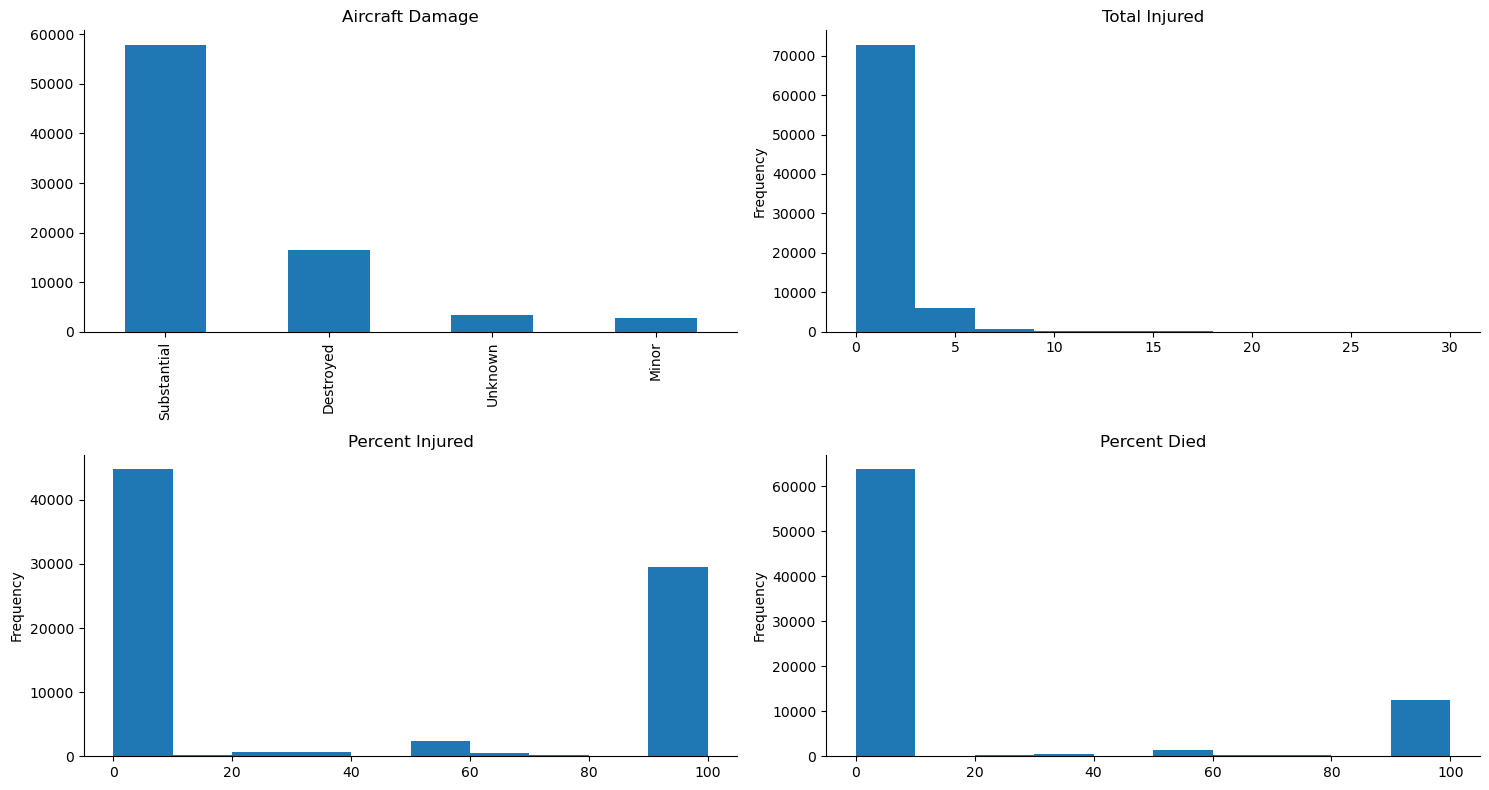

In [18]:
fig, ax = plt.subplots(2,2, figsize = ((15,8)))


df['Aircraft.damage'].value_counts().plot.bar(ax=ax[0,0]);
ax[0, 0].set_title("Aircraft Damage")
ax[0, 0].set_xlabel("")

df['Total.Injured'].plot.hist(ax=ax[0,1], range=[0,30])
ax[0, 1].set_title("Total Injured")
ax[0, 1].set_xlabel("")

df['Percent.Injured'].plot.hist(ax=ax[1,0])
ax[1, 0].set_title("Percent Injured")
ax[1, 0].set_xlabel("")

df['Percent.Died'].plot.hist(ax=ax[1,1]);
ax[1, 1].set_title("Percent Died")
ax[1, 1].set_xlabel("")

plt.tight_layout()
sns.despine()

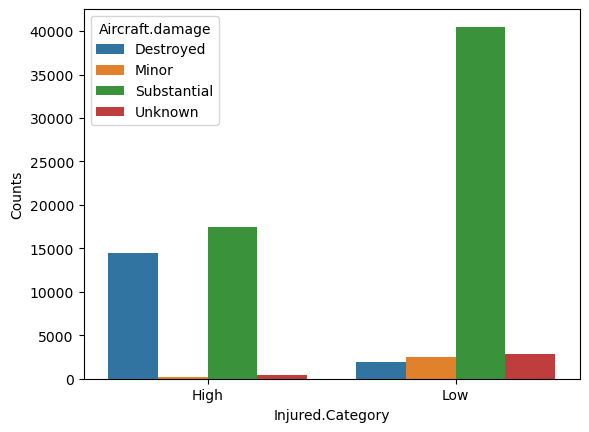

In [32]:
gb = df.groupby(['Injured.Category', 'Aircraft.damage']).size().reset_index(name='Counts')
sns.barplot(data=gb, x = "Injured.Category", y = "Counts", hue = "Aircraft.damage");

In [20]:
# 1) How can we ensure the damages are minor or substantial instead of destroyed? 
# 2) If the damages are substantial, how can we ensure that few people are injured? 

In [25]:
df.groupby('Aircraft.damage').mean(numeric_only=True)

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Passengers,Total.Injured,Percent.Injured,Percent.Died
Aircraft.damage,,,,,,,,
Destroyed,2.330469,0.392333,0.351313,0.507223,3.581337,3.074115,87.933673,62.910361
Minor,0.104643,0.188283,0.516212,41.432203,42.241341,0.809138,8.228907,1.808507
Substantial,0.118233,0.190409,0.279796,2.541310,3.129747,0.588437,28.868773,5.800853
Unknown,0.378793,0.432118,0.520380,50.867913,52.199203,1.331290,17.871896,6.326784
